
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop(105,axis=0,inplace=True) #drop the 105 row

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
df.isna().sum()

,0
Month,0
Sales,0


In [ ]:
# Convert Month into Datetime
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

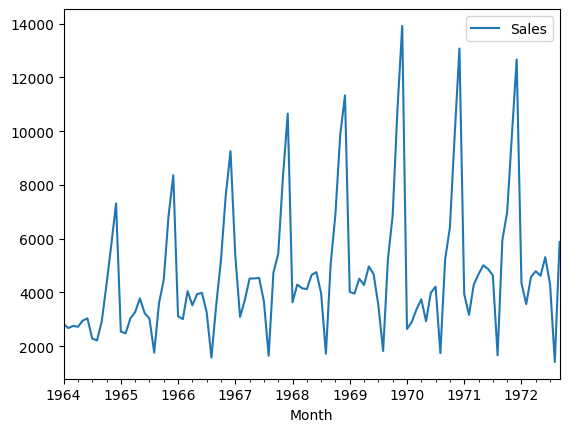

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Sales'])

In [ ]:
test_result

(-1.8335930563276215,
 0.36391577166024586,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

,Sales
Month,
1964-01-01,NaN
1964-02-01,2815.0
1964-03-01,2672.0
1964-04-01,2755.0
1964-05-01,2721.0
...,...
1972-05-01,4788.0
1972-06-01,4618.0
1972-07-01,5312.0


In [ ]:
df['Seasonal First Difference'] = df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
## Again test dickey fuller test for the (12)th diffrence
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


- The Data beocem stationay at diff(12)
- Seasonal First Diffence

<Axes: xlabel='Month'>

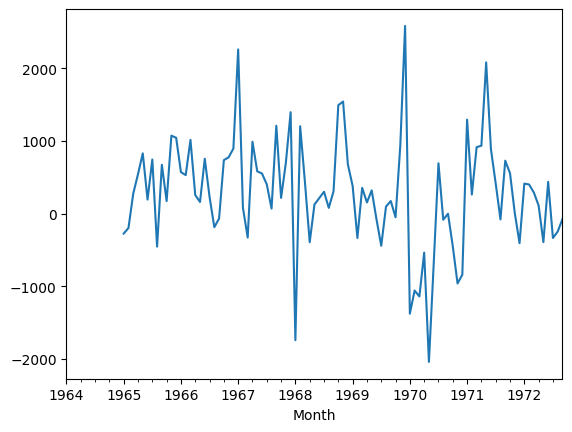

In [ ]:
df['Seasonal First Difference'].plot() ##fSeasonel diffrencing plot

## Auto Regressive Model
![image.png](attachment:image.png)

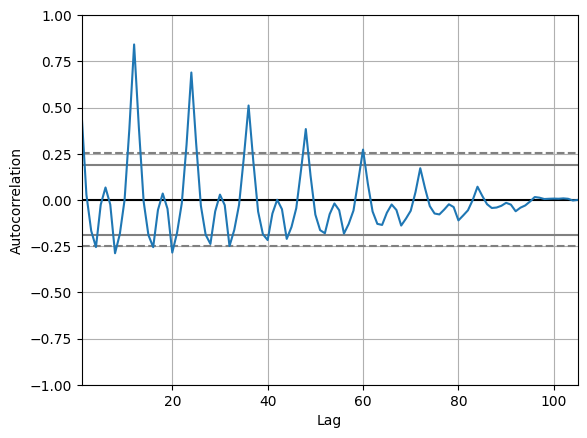

In [ ]:
from pandas.plotting import autocorrelation_plot # import the autocorrelation_plot function from pandas.plotting
autocorrelation_plot(df['Sales'])
plt.show()

# **Autocorrelation Plot (ACF)**
Definition:
- The Autocorrelation Function (ACF) measures the correlation between a time series and its lagged versions (previous time points).
- It quantifies how well the current value of the series is related to its past values.

### Interpretation:

- The x-axis represents the lag (the number of time periods back).
- The y-axis represents the correlation coefficient at each lag.
- If the correlation is significant (usually indicated by confidence intervals), it suggests that the time series is influenced by its past values.

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  
    - The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.
    -  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.
    -  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.
    -  A clearer pattern for an MA model is in the ACF.
    -  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    - p,d,q
    - p AR model lags
    - d differencing
    - q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib library
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # import the plot_acf and plot_pacf functions from statsmodels.graphics.tsaplots
import statsmodels.api as sm # import the statsmodels library and assign it to the alias 'sm'


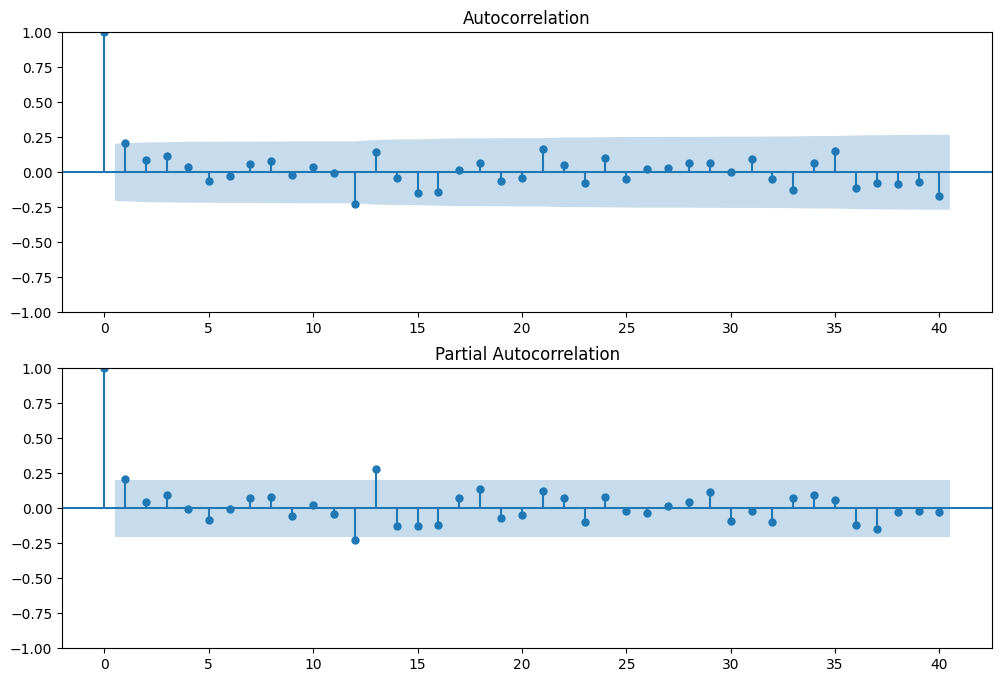

In [ ]:

# Create a new figure for the plots, with a specified size (12 inches by 8 inches)
fig = plt.figure(figsize=(12, 8))

# Add the first subplot (ACF) in a 2-row, 1-column layout
ax1 = fig.add_subplot(211)

# Plot the Autocorrelation Function (ACF) on the first subplot
# - Select the seasonal first difference of the time series from the 14th observation onward
# - Calculate ACF for up to 40 lags
# - Draw the plot on the ax1 subplot
fig = sm.graphics.tsa.plot_acf(
    df['Seasonal First Difference'].iloc[13:],  # Data to plot ACF
    lags=40,  # Number of lags to include in the plot
    ax=ax1  # Specify the subplot to draw the ACF on
)

# Add the second subplot (PACF) in a 2-row, 1-column layout
ax2 = fig.add_subplot(212)

# Plot the Partial Autocorrelation Function (PACF) on the second subplot
# - Select the seasonal first difference of the time series from the 14th observation onward
# - Calculate PACF for up to 40 lags
# - Draw the plot on the ax2 subplot
fig = sm.graphics.tsa.plot_pacf(
    df['Seasonal First Difference'].iloc[13:],  # Data to plot PACF
    lags=40,  # Number of lags to include in the plot
    ax=ax2  # Specify the subplot to draw the PACF on
)

# Show the plots
plt.show()


- the last point outside teh shaded region from that point we will take the values of p or q.

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA # import the ARIMA model from statsmodels.tsa.arima.model

model = ARIMA(df['Sales'],order=(1,1,1)) # instantiate the ARIMA model with the specified order
model_fit = model.fit() # fit the model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 04 Oct 2024   AIC                           1911.627
Time:                        12:18:47   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference,forecast_arima
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN


<Axes: xlabel='Month'>

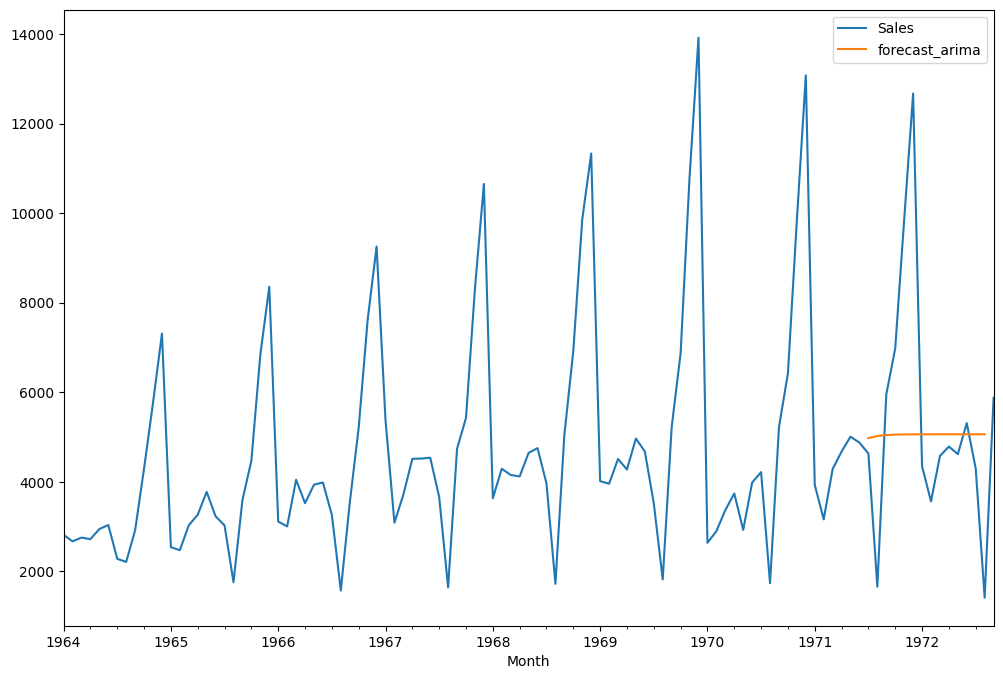

In [ ]:
df['forecast_arima'] = model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast_arima']].plot(figsize=(12,8))

In [ ]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference,forecast_arima
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN


In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

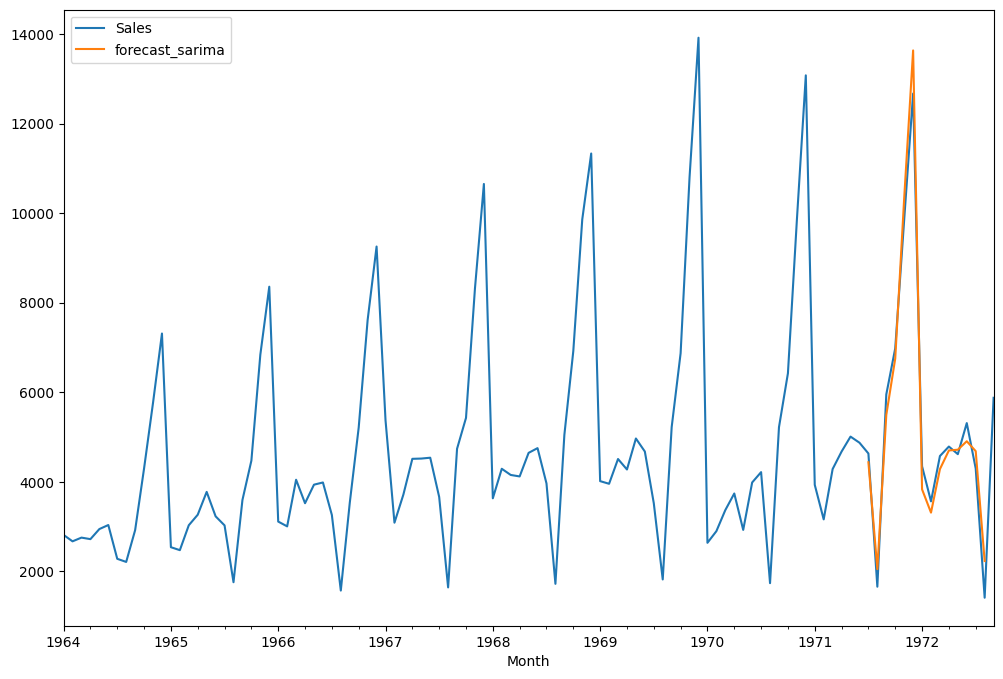

In [ ]:
df['forecast_sarima'] = results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast_sarima']].plot(figsize=(12,8))

<Axes: xlabel='Month'>

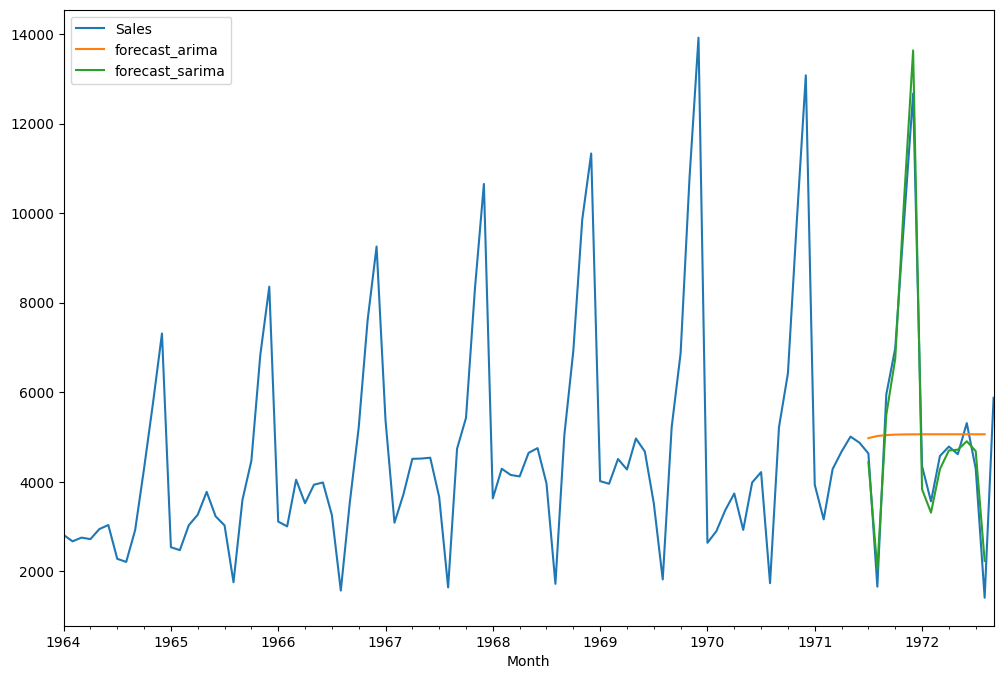

In [ ]:
#ARIMAX and SARIMAX plot
df[['Sales','forecast_arima','forecast_sarima']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
#Take the This Dates

In [ ]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast_arima,forecast_sarima
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df = pd.concat([df,future_datest_df])

<ipython-input-92-a3e7ec223b87>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df,future_datest_df])


<Axes: >

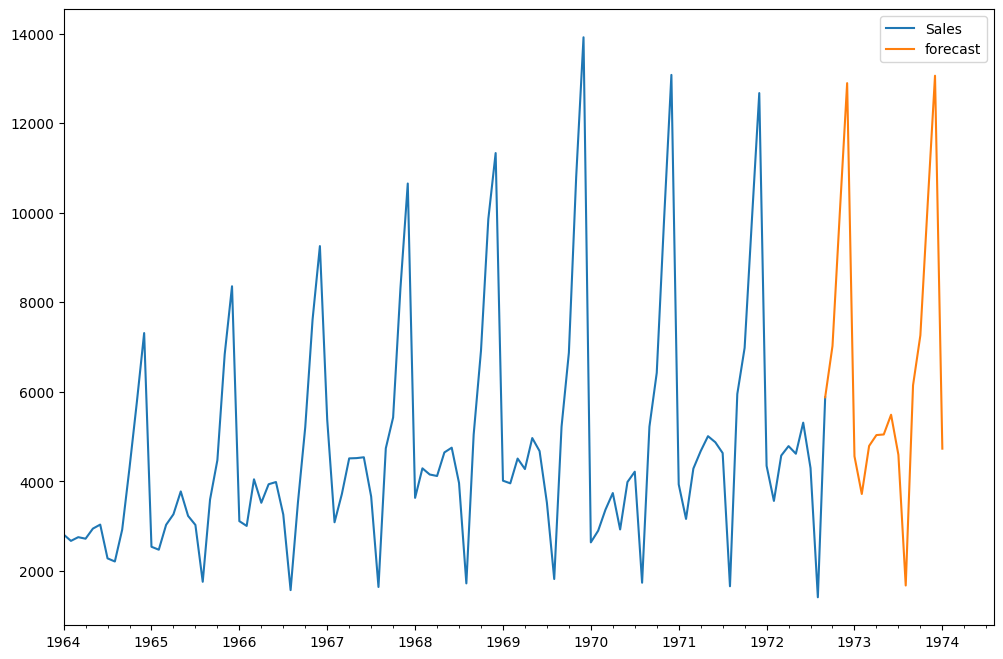

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df

,Sales,Sales First Difference,Seasonal First Difference,forecast_arima,forecast_sarima,forecast
1964-01-01,2815.0,NaN,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN,NaN
